# Setting up and installing dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.14.0-cp311-cp311-macosx_12_0_arm64.whl (2.1 kB)
  Using cached opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl (33.1 MB)
  Using cached matplotlib-3.8.0-cp311-cp311-macosx_11_0_arm64.whl (7.5 MB)
  Using cached tensorflow_macos-2.14.0-cp311-cp311-macosx_12_0_arm64.whl (199.7 MB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.9.0-cp311-cp311-macosx_11_0_arm64.whl (2.6 MB)
  Using cached libclang-16.0.6-py2.py3-none-macosx_11_0_arm64.whl (20.6 MB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-macosx_10_9_universal2.whl (1.2 MB)
  Using cached numpy-1.26.0-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.24.3-cp37-abi3-m

In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
appnope                      0.1.3
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.3.0
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.0
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.0
flatbuffers                  23.5.26
fonttools                    4.43.0
gast                         0.5.4
google-auth                  2.23.2
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.59.0
h5py                         3.9.0
idna                         3.4
ipykernel                    6.25.2
ipython                      8.16.0
jedi                         0.19.0
jup

In [3]:
import tensorflow as tf
import os

In [4]:
os.listdir("melanoma-scanner")

['.DS_Store', 'melanoma_cancer_dataset', '.git']

In [5]:
gpus = tf.config.experimental.list_physical_devices("GPU")

In [6]:
gpus

[]

In [7]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    f.config.experimental.set_memory_growth(gpu, True)

# Removing dodgy images(imghdr deprecated)

In [22]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [9]:
all_encompassing_dir = "Melanoma-Scanner"

In [13]:
os.listdir(all_encompassing_dir)

['.DS_Store', 'melanoma_cancer_dataset', '.git']

In [30]:
all_images_dir = "Melanoma-Scanner/melanoma_cancer_dataset"

In [31]:
os.listdir(all_images_dir)

['.DS_Store', 'test', 'train']

In [16]:
train_images_dir = "Melanoma-Scanner/melanoma_cancer_dataset/train"

In [17]:
os.listdir(train_images_dir)

['malignant', 'benign']

In [18]:
test_images_dir = "Melanoma-Scanner/melanoma_cancer_dataset/test"

In [19]:
os.listdir(test_images_dir)

['.DS_Store', 'malignant', 'benign']

In [24]:
image_ext = ['jpg']

# Load Data

In [41]:
tf.data.Dataset??

In [33]:
import numpy as np
from matplotlib import pyplot as plt

In [42]:
tf.keras.utils.image_dataset_from_directory??

In [44]:
data = tf.keras.utils.image_dataset_from_directory(all_encompassing_dir)

Found 10605 files belonging to 1 classes.


In [45]:
data_iterator = data.as_numpy_iterator()

In [46]:
data_iterator

In [47]:
batch = data_iterator.next()

In [49]:
batch[0].shape

(32, 256, 256, 3)

In [59]:
scaled = batch[0]/255

In [60]:
scaled.max()

1.0

# Preprocess Data

In [62]:
normalized_data = data.map(lambda x, y: (x/255, y))

In [66]:
element = next(normalized_data.as_numpy_iterator())

In [69]:
element[0].max()

1.0

# Randomize Data

In [80]:
shuffled_data = normalized_data.shuffle(len(normalized_data))

# Split Data

In [81]:
len(shuffled_data)

332

In [82]:
train_size = int(len(normalized_data)*.7)
val_size = int(len(normalized_data)*.2)
test_size = int(len(normalized_data)*.1)+1

In [83]:
train_size

232

In [84]:
test_size

34

In [85]:
val_size

66

In [86]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Model

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [90]:
model = Sequential()

In [91]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [94]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 256)               3

# Train Model

In [96]:
logdir = 'logs'

In [97]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [98]:
history = model.fit(train, epochs = 20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
232/232 [==============================] - 60s 258ms/step - loss: 0.0482 - accuracy: 0.9988 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
232/232 [==============================] - 61s 262ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
232/232 [==============================] - 59s 256ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
232/232 [==============================] - 60s 260ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
232/232 [==============================] - 60s 256ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
232/232 [==============================] - 95s 409ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
232/232 [==============================] - 59s 254ms/step - loss: 0.0000e+0

In [99]:
history.history

{'loss': [0.04818379878997803,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'accuracy': [0.9987877011299133,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

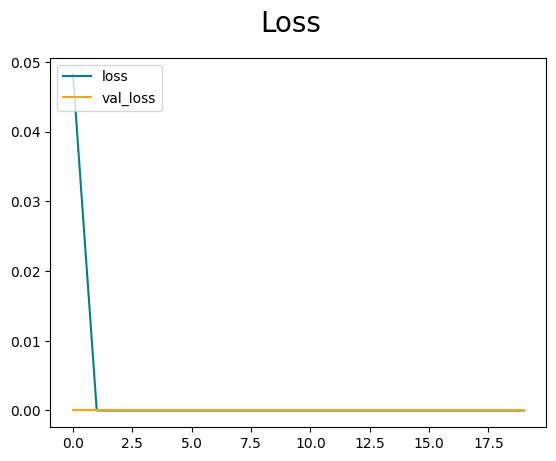

In [101]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

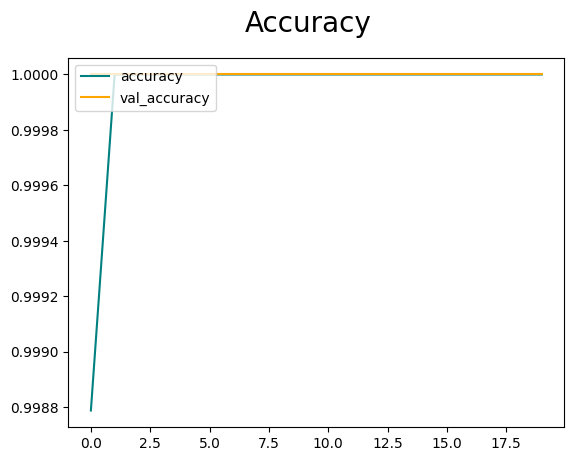

In [102]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate Performance

In [103]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [104]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [105]:
len(test)

34

In [107]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 49ms/step


In [109]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

Precision:0.0, Recall:0.0, Accuracy:1.0


# Testing the Data

In [111]:
import cv2

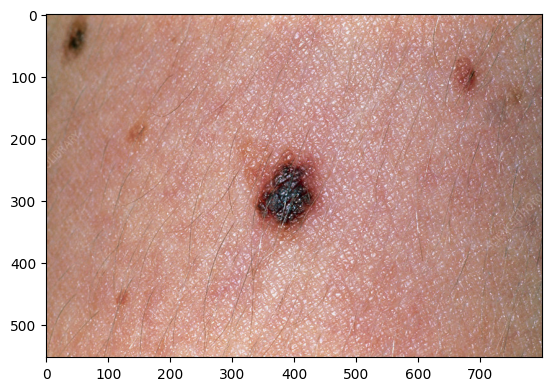

In [122]:
img = cv2.imread('benign_image.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

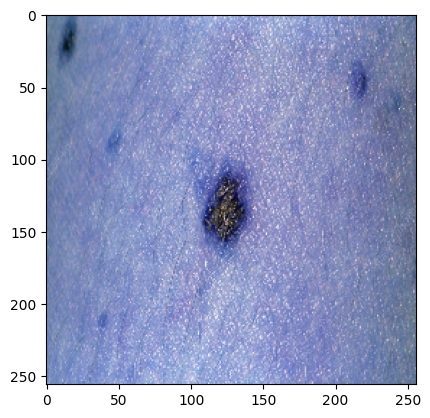

In [123]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [124]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [125]:
yhtat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [126]:
yhat

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [127]:
if yhat.all()>0.5:
    print(f'Predicted image is a benign mole')
else:
    print(f'Predicted image is a malignant mole')

Predicted image is a malignant mole


# Save Model

In [128]:
from tensorflow.keras.models import load_model

In [129]:
model.save(os.path.join('models', 'melanoma_model.h5'))

/Users/elangoldman/melanoma-scanner/melanomascanner/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [130]:
new_model = load_model(os.path.join('models', 'melanoma_model.h5'))

In [131]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 44ms/step


array([[0.]], dtype=float32)